In [1]:
# Main libries for Ml  

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print("TensorFlow v" + tf.__version__)

TensorFlow v2.19.0


In [3]:
df = pd.read_csv('train.csv')

# Display the first few rows of the DataFrame to verify the import
print("CSV file loaded successfully")

CSV file loaded successfully


In [4]:
df.head(5)

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [5]:
df.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

<Axes: xlabel='Transported'>

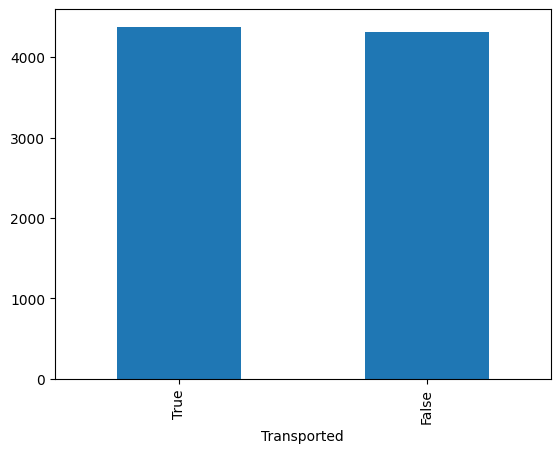

In [6]:
plot_df = df.Transported.value_counts()
plot_df.plot(kind="bar")

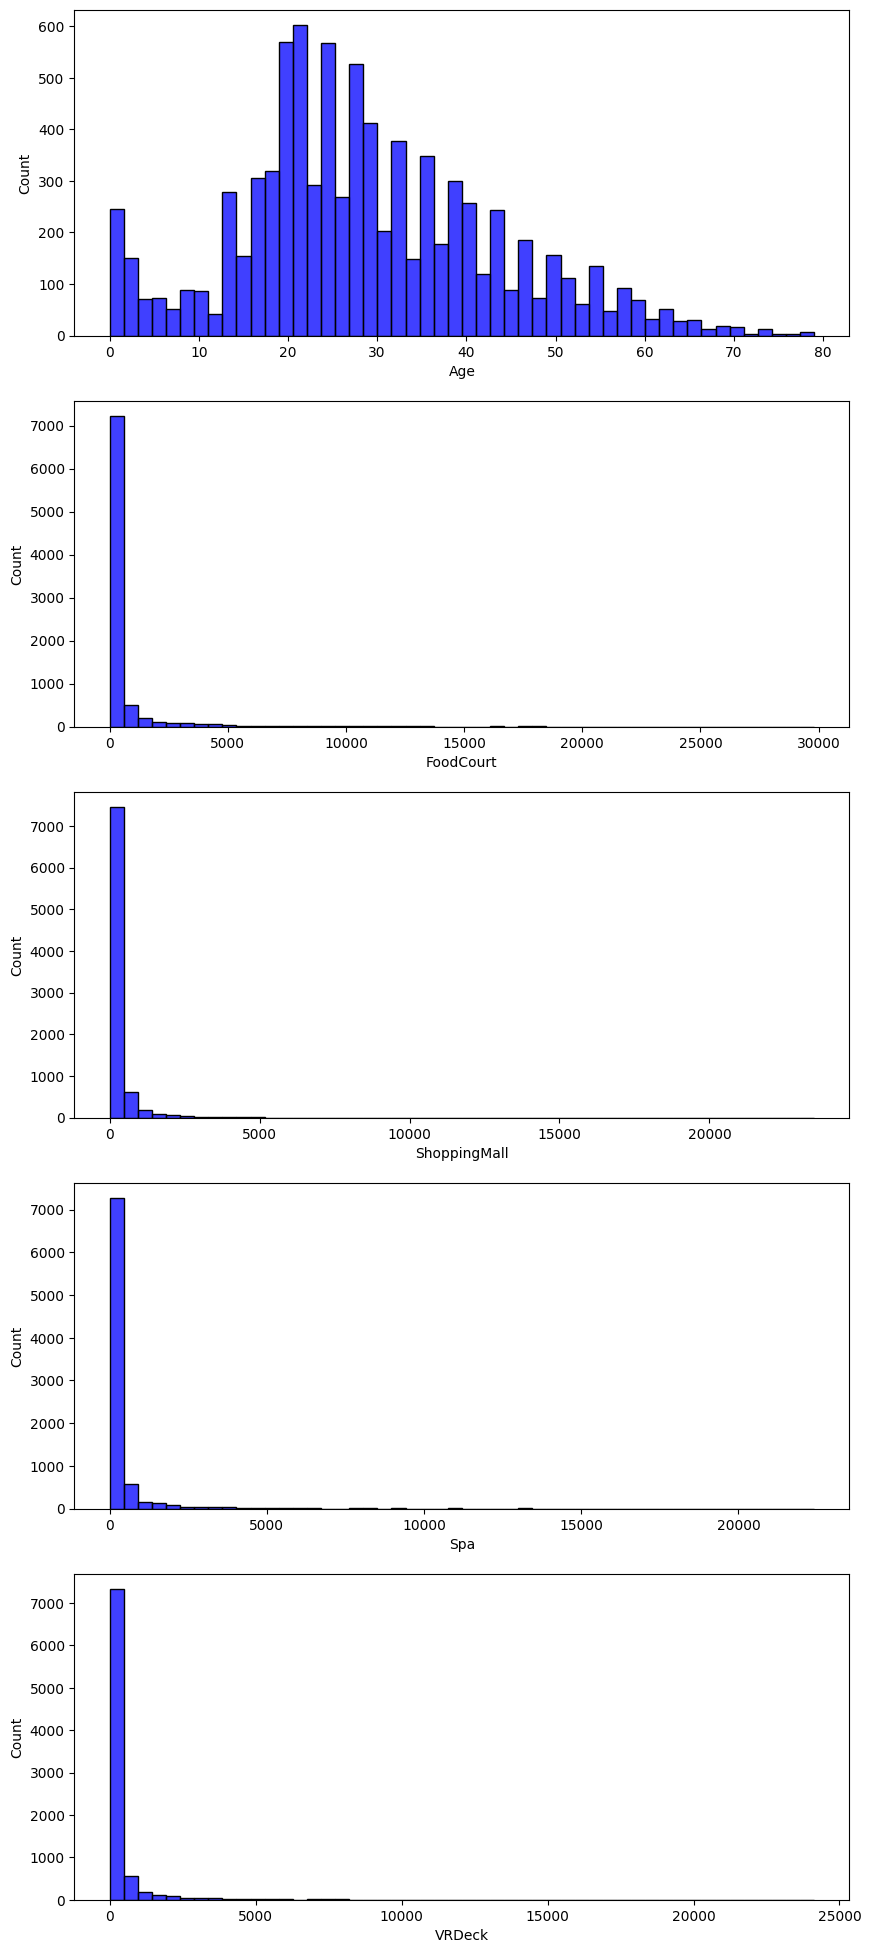

In [7]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(df['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(df['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(df['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(df['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(df['VRDeck'], color='b', bins=50, ax=ax[4]);

In [8]:
df = df.drop(['PassengerId', 'Name'], axis=1)
df.head(5)

HomePlanet CryoSleep  Cabin  Destination   Age    VIP  RoomService  \
0     Europa     False  B/0/P  TRAPPIST-1e  39.0  False          0.0   
1      Earth     False  F/0/S  TRAPPIST-1e  24.0  False        109.0   
2     Europa     False  A/0/S  TRAPPIST-1e  58.0   True         43.0   
3     Europa     False  A/0/S  TRAPPIST-1e  33.0  False          0.0   
4      Earth     False  F/1/S  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0        0.0           0.0     0.0     0.0        False  
1        9.0          25.0   549.0    44.0         True  
2     3576.0           0.0  6715.0    49.0        False  
3     1283.0         371.0  3329.0   193.0        False  
4       70.0         151.0   565.0     2.0         True

In [9]:
df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [10]:
df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
df.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Cabin           199
Destination     182
RoomService     181
Age             179
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [11]:
df['Transported'] = df['Transported'].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)

In [12]:
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)

In [13]:
try:
    df = df.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

In [14]:
df.head(5)

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0     Europa          0  TRAPPIST-1e  39.0    0          0.0        0.0   
1      Earth          0  TRAPPIST-1e  24.0    0        109.0        9.0   
2     Europa          0  TRAPPIST-1e  58.0    1         43.0     3576.0   
3     Europa          0  TRAPPIST-1e  33.0    0          0.0     1283.0   
4      Earth          0  TRAPPIST-1e  16.0    0        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported Deck Cabin_num Side  
0           0.0     0.0     0.0            0    B         0    P  
1          25.0   549.0    44.0            1    F         0    S  
2           0.0  6715.0    49.0            0    A         0    S  
3         371.0  3329.0   193.0            0    A         0    S  
4         151.0   565.0     2.0            1    F         1    S

In [15]:
import numpy as np  # include this if not already

def split_dataset(dataset, test_ratio=0.20):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))


6931 examples in training, 1762 examples in testing.


In [19]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

print("TensorFlow version:", tf.__version__)
print("TensorFlow Decision Forests version:", tfdf.__version__)


ModuleNotFoundError: No module named 'tensorflow_decision_forests'

In [20]:
import tensorflow_decision_forests as tfdf

ModuleNotFoundError: No module named 'tensorflow_decision_forests'

In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)